In [24]:
import numpy as np
import pandas as pd

# implementation of kmeans
# d1 = { 0: m1, 1: m2,2: m3 }
# m1 = [0.227680, 0.858204]
# m2 = [0.979188, 0.077151]
# m3 = [0.504577, 0.553114]

# distance = [m1-0th element, m2-oth element, m3-oth element]
# distance.index(min(distance))

# d2 = { 0: [],1: [],2:[] }

class kmeans:
    def __init__(self,k=3,tolerance=0.0001,max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
    def fit(self, data):
        self.centroids = {}
        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

			#find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
				#print(distances)
                classification = distances.index(min(distances))
				#print(classification)
                self.classes[classification].append(features)
			
            previous = dict(self.centroids)

			#average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

			#for centroid in self.centroids:
            #    original_centroid = previous[centroid]
            #    curr = self.centroids[centroid]
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

			#break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break


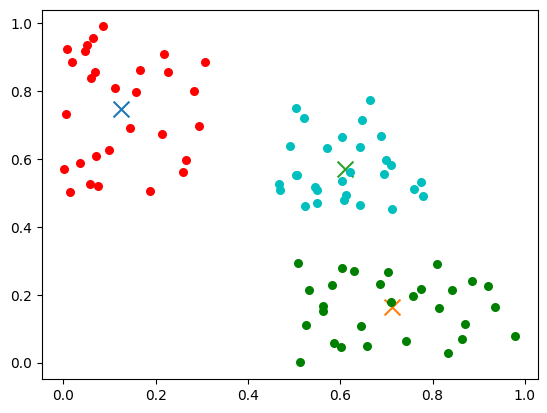

In [27]:
import matplotlib.pyplot as plt
def main():
	
	df = pd.read_csv(r"ipl.csv")
	df = df[['one', 'two']]
	#dataset = df.astype(float).values.tolist()

	X = df.values #returns a numpy array
	#X = X[:10]
	#print(X)
	
	km = kmeans(3)
	km.fit(X)
	
	# Plotting starts here
	colors = 10*["r", "g", "c", "b", "k"]

	for centroid in km.centroids:
		plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

	for classification in km.classes:
		color = colors[classification]
		for features in km.classes[classification]:
			plt.scatter(features[0], features[1], color = color,s = 30)
	
	plt.show()
	#mpld3.show()
	
if __name__ == "__main__":
	main()

In [11]:
print(distances.index(min(distances)))

1
